In [1]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

In [2]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

housing.data


**数据处理**

In [3]:
import numpy as np
datafile='work/housing.data'
data=np.fromfile(datafile,sep=' ')
print(data)
data.shape

[6.320e-03 1.800e+01 2.310e+00 ... 3.969e+02 7.880e+00 1.190e+01]


(7084,)

In [4]:
feature_names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
data=data.reshape(data.shape[0]//len(feature_names),len(feature_names))
data.shape

(506, 14)

In [5]:
#数据划分
n=0.8
offset =int(data.shape[0]*n)#
train_data=data[:offset]#训练集
test_data=data[offset:]#测试集

In [6]:
#数据归一化
arr1=np.array([1,2,3])
arr1.max()
arr1=np.array([[1,2,3],[4,5,6]])
arr1.max (axis=1)#代表求最大值，0时是每一列，1时为每一行
arr1.min (axis=1)
arr1[:,:-1]#取除最后一个的所有元素
arr1[:,-1:0]#取最后一个所有元素

minnums=data.min(axis=0)#求每一列的最小值
maxnums=data.max(axis=0)#最大值
#avgs=data.sum(axis=0)/train_data.shape#平均值
feature_nums=len(feature_names)
for i in range(feature_nums):
    #print(minnum[i],maxnum[i])
    data[:,i]=(data[:,i]-minnums[i])/(maxnums[i]-minnums[i])


In [7]:
def load_data_s(datafile,feature_num,n):
    data = np.fromfile(datafile,sep=' ')
    data = data.reshape(data.shape[0]//feature_num,feature_num)
    minnums=data.min(axis=0)#求每一列的最小值
    maxnums=data.max(axis=0)#最大值
    for i in range(feature_nums):
        data[:,i]=(data[:,i]-minnums[i])/(maxnums[i]-minnums[i])
    offset = int(data.shape[0]*n)
    train_data=data[:offset]
    test_data=data[offset:]
    return train_data,test_data

In [8]:
train_data,test_data=load_data_s(datafile="work/housing.data",feature_num=14,n = 0.8)
x = train_data[:,:-1]
y = train_data[:,-1:]
x.shape

(404, 13)

**模型设计**

In [9]:
w = [0.1,0.2,0.2,0.1,0.1,0.3,0.3,0.2,0.1,0.1,0.2,0.2,0.1]
b = 0.2
#z = w[0]*[0][0]+b #前向传播
w = np.array(w)#将w转换为数组
w=w.reshape([13,1])
z = np.dot(x,w)+b#当要求N个样本时?->循环，其实numpy提供了广播机制
print(len(z))
#print(z)

#for i in range(len(train_data)):
#   z=np.dot(x[i]*w)+b

404


**前向传播**


In [10]:
class Network(object):
    def __init__(self,weight_nums):
        np.random.seed(0) #引入随机数种子，防止数据改变
        self.w=np.random.randn(weight_nums,1) #产生weight_nums行1列的样本
        self.b=0.2
    def forward(self,x):
        z=np.dot(x,self.w)+self.b
        return z
    def loss(self,z,y):
        error=z-y
        cost=error*error
        loss=np.mean(cost)
        return loss
    def gradient(self,x,y): #计算梯度
        z=self.forward(x)
        gradient_w=(z-y)*x
        gradient_w=np.mean(gradient_w,axis=0) #计算梯度的均值
        gradient_w=gradient_w[:,np.newaxis] #增加梯度的维度

        gradient_b=z-y
        gradient_b=np.mean(gradient_b)
        return gradient_w,gradient_b
    #参数更新
    def update(self,gradient_w,gradient_b,eta):
        self.w = self.w - eta*gradient_w
        self.b = self.b - eta*gradient_b
    
    #模型训练
    def train(self,x,y,n=100,eta=0.01):
        Losses=[]
        for i in range(n):
            z=self.forward(x)
            gradient_w,gradient_b=self.gradient(x,y)
            self.update(gradient_w,gradient_b,eta)
            L=self.loss(z,y)
            Losses.append(L)
         #作业一：每隔10个打印一个loss，打印所有loss
            if (i +1) % 10 == 0:
               print('iter{},loss{}'.format(i,L))
        return Losses

**模型的训练**

iter9,loss5.6158411168609375
iter19,loss3.3249724239788336
iter29,loss2.1855722104515833
iter39,loss1.6090324567404453
iter49,loss1.3081060481988538
iter59,loss1.1425891242459314
iter69,loss1.0440259945520045
iter79,loss0.9789708945185633
iter89,loss0.9310624695354961
iter99,loss0.8922774059915114
iter109,loss0.8586627741520443
iter119,loss0.8282536379989837
iter129,loss0.8000569099931762
iter139,loss0.7735554552391098
iter149,loss0.7484660416684528
iter159,loss0.7246211519683269
iter169,loss0.7019112348490648
iter179,loss0.6802564502449057
iter189,loss0.659592809288425
iter199,loss0.6398653416402492
iter209,loss0.62102469525128
iter219,loss0.6030254143277723
iter229,loss0.5858250393936898
iter239,loss0.569383611568324
iter249,loss0.5536633770047952
iter259,loss0.5386285917745444
iter269,loss0.5242453784003404
iter279,loss0.5104816100915432
iter289,loss0.4973068108679142
iter299,loss0.48469206568473683
iter309,loss0.4726099375700623
iter319,loss0.46103439020495846
iter329,loss0.4499407

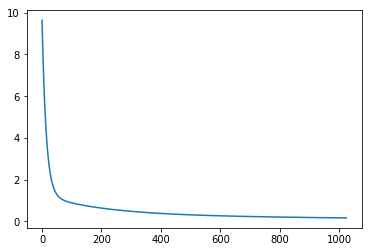

In [12]:
net = Network(13)
n = 1026
losses = net.train(x,y,n)
from matplotlib import pyplot as plt
plot_x=np.arange(n)
plot_y=np.array(losses)
plt.plot(plot_x,plot_y)
plt.show()